In [1]:
# Importing necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Importing necessary libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Importing tools for splitting data into training and testing sets
from sklearn.model_selection import train_test_split, GridSearchCV

# Importing machine learning models for classification
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

# Importing metrics for evaluating model performance
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import pickle

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Reading a CSV file ('copper_cleaned.csv') into a pandas DataFrame
copper4 = pd.read_csv('https://raw.githubusercontent.com/VivekS-DS/copper_price_prediction_app/main/copper_clean_dataset.csv')

# Displaying the first few rows of the DataFrame to inspect the data
copper4.head()

,customer,country,status,item_type,application,width,product_ref,quantity_tons_log_tr,thickness_log_tr,selling_price_log_tr,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308,28,1,1,10,1500,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30341428,38,1,2,10,1275,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
2,30165529,78,1,1,10,1250,164141591,3.314642,-0.287682,7.001246,1,4,2021,1,7,2021
3,30202362,27,1,2,10,1010,628377,3.473063,-0.510826,6.880384,1,4,2021,1,7,2021
4,30211222,30,1,1,10,900,611993,3.035295,-0.798508,7.181736,1,4,2021,1,7,2021


In [3]:
# Displaying concise summary information about the DataFrame 'copper4'
copper4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130274 entries, 0 to 130273
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   customer              130274 non-null  int64  
 1   country               130274 non-null  int64  
 2   status                130274 non-null  int64  
 3   item_type             130274 non-null  int64  
 4   application           130274 non-null  int64  
 5   width                 130274 non-null  int64  
 6   product_ref           130274 non-null  int64  
 7   quantity_tons_log_tr  130274 non-null  float64
 8   thickness_log_tr      130274 non-null  float64
 9   selling_price_log_tr  130274 non-null  float64
 10  item_date_day         130274 non-null  int64  
 11  item_date_month       130274 non-null  int64  
 12  item_date_year        130274 non-null  int64  
 13  delivery_date_day     130274 non-null  int64  
 14  delivery_date_month   130274 non-null  int64  
 15  

In [4]:
# Separating features (X) and target variable (y) from the DataFrame 'copper4'
x = copper4.drop('selling_price_log_tr', axis=1)
y = copper4['selling_price_log_tr']

In [5]:
# Splitting the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((104219, 15), (26055, 15), (104219,), (26055,))

# RandomForestRegression

### Hyperparameter Tuning

In [7]:
def GridSearchCV_rfr():

  param = {'criterion':['squared_error','friedman_mse','poisson'],
           'max_samples':[None,0.5,1],
           'min_samples_split': [2,3,4],
           'min_samples_leaf':[1,2],
           'max_features':[None,'sqrt','log2']
            }

  # GridSearchCV for hyperparameter tuning with a Randomforest
  grid_search_rfr = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param, cv=5,
                              scoring='r2',n_jobs=-1)
  grid_search_rfr.fit(x_train, y_train)

  return print(grid_search_rfr.best_params_)

GridSearchCV_rfr()

{'criterion': 'squared_error', 'max_features': None, 'max_samples': None, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [29]:
# Creating a RandomForestRegressor with specified hyperparameters
rfr = RandomForestRegressor(criterion='squared_error',
                             max_features=None,
                             max_samples=None,
                             min_samples_split=3,
                             min_samples_leaf=1,
                             random_state=42)

# Fitting the RandomForestRegressor on the training data
rfr.fit(x_train, y_train)

# Predicting on the test set
rfr_predict_train = rfr.predict(x_train)
# Predicting on the test set
rfr_predict_test = rfr.predict(x_test)


In [32]:
# Model Evaluation

MSE_rfr_train = mean_squared_error(y_train, rfr_predict_train)
MSE_rfr_test = mean_squared_error(y_test, rfr_predict_test)
rmse_rfr_train = np.sqrt(MSE_rfr_train)
rmse_rfr_test = np.sqrt(MSE_rfr_test)
r2_rfr_train = r2_score(y_train, rfr_predict_train)
r2_rfr_test = r2_score(y_test, rfr_predict_test)
MAE_rfr_train = mean_absolute_error(y_train, rfr_predict_train)
MAE_rfr_test = mean_absolute_error(y_test, rfr_predict_test)

metrics_rfr = {'Model': ['RandomForestRegressor_Train', 'RandomForestRegressor_Test'],
           'MAE':[MAE_rfr_train, MAE_rfr_test],
           'MSE': [MSE_rfr_train,MSE_rfr_test],
           'RMSE': [rmse_rfr_train,rmse_rfr_test],
           'R-Squared':[r2_rfr_train,r2_rfr_test]}

rfr_model_eveluation = pd.DataFrame(metrics_rfr)
rfr_model_eveluation


,Model,MAE,MSE,RMSE,R-Squared
0,RandomForestRegressor_Train,0.011599,0.000352,0.018772,0.993645
1,RandomForestRegressor_Test,0.028415,0.002036,0.045123,0.963323


# ExtreTreesRegressor

### Hyperparameter Tuning

In [14]:
def GridSearchCV_etr():

  param_etr = {'criterion':['squared_error','friedman_mse','poisson'],
              'max_samples':[None,0.5,0.8],
              'min_samples_split': [3,4],
               'min_samples_leaf': [1,2],
              'max_features':[None,'sqrt','log2']
                }

  # GridSearchCV for hyperparameter tuning with a ExtraTreesRegressor
  grid_search_etr = GridSearchCV(estimator=ExtraTreesRegressor(random_state=1),
                              param_grid=param_etr, cv=5,
                              scoring='r2',n_jobs=-1)
  grid_search_etr.fit(x_train, y_train)

  return print(grid_search_etr.best_params_)

GridSearchCV_etr()

{'criterion': 'squared_error', 'max_features': None, 'max_samples': None, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [30]:
# Creating a ExtraTreesRegressor with specified hyperparameters
model_etr = ExtraTreesRegressor(criterion='squared_error',
                             max_features=None,
                             max_samples=None,
                             min_samples_split=4,
                             min_samples_leaf=1,
                             bootstrap=True,
                             random_state=1)

# Fitting the RandomForestRegressor on the training data
model_etr.fit(x_train, y_train)

# Predicting on the test set
etr_predict_train = model_etr.predict(x_train)
# Predicting on the test set
etr_predict_test = model_etr.predict(x_test)

In [31]:
# Model Evaluation ExtraTreesRegressor

MSE_etr_train = mean_squared_error(y_train, etr_predict_train)
MSE_etr_test = mean_squared_error(y_test, etr_predict_test)
rmse_etr_train = np.sqrt(MSE_etr_train)
rmse_etr_test = np.sqrt(MSE_etr_test)
r2_etr_train = r2_score(y_train, etr_predict_train)
r2_etr_test = r2_score(y_test, etr_predict_test)
MAE_etr_train = mean_absolute_error(y_train, etr_predict_train)
MAE_etr_test = mean_absolute_error(y_test, etr_predict_test)

metrics_etr = {'Model': ['ExtraTreesRegressor_Train', 'ExtraTreesRegressor_Test'],
           'MAE':[MAE_etr_train, MAE_etr_test],
           'MSE': [MSE_etr_train,MSE_etr_test],
           'RMSE': [rmse_etr_train,rmse_etr_test],
           'R-Squared':[r2_etr_train,r2_etr_test]}

etr_model_eveluation = pd.DataFrame(metrics_etr)
etr_model_eveluation

,Model,MAE,MSE,RMSE,R-Squared
0,ExtraTreesRegressor_Train,0.016610,0.000668,0.025855,0.987943
1,ExtraTreesRegressor_Test,0.030618,0.002234,0.047266,0.959758


# DecisionTreeRegression

### Hyperparameter Tuning

In [18]:

def GridSearchCV_dtr():
  # Define a dictionary of hyperparameters for the DecisionTreeRegressor
  param_dtr = {
                'criterion': ['squared_error','friedman_mse','poisson'],
                'splitter': ['best', 'random'],
                'min_samples_split': [2, 3, 4],
                'max_features': [None, 'sqrt', 'log2']
                }

  # Create a GridSearchCV object for hyperparameter tuning with DecisionTreeClassifier
  grid_search_dtr = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                                   param_grid=param_dtr, cv=5,
                                   scoring='r2')

  # Fit the model on the training data to find the best hyperparameters
  grid_search_dtr.fit(x_train, y_train)
  return print(grid_search_dtr.best_params_)

GridSearchCV_dtr()

{'criterion': 'poisson', 'max_features': None, 'min_samples_split': 4, 'splitter': 'best'}


In [23]:
# Creating a DecisionTreeRegressor with specified hyperparameters
model_dtr = DecisionTreeRegressor(criterion='poisson',
                             max_features=None,
                             min_samples_split=4,
                             min_samples_leaf=1,
                             splitter='best',
                             random_state=42
                             )

# Fitting the RandomForestRegressor on the training data
model_dtr.fit(x_train, y_train)

# Predicting on the test set
dtr_predict_train = model_dtr.predict(x_train)
# Predicting on the test set
dtr_predict_test = model_dtr.predict(x_test)

In [24]:
# Model Evaluation DecisionTreeRegressor

MSE_dtr_train = mean_squared_error(y_train, dtr_predict_train)
MSE_dtr_test = mean_squared_error(y_test, dtr_predict_test)
rmse_dtr_train = np.sqrt(MSE_dtr_train)
rmse_dtr_test = np.sqrt(MSE_dtr_test)
r2_dtr_train = r2_score(y_train, dtr_predict_train)
r2_dtr_test = r2_score(y_test, dtr_predict_test)
MAE_dtr_train = mean_absolute_error(y_train, dtr_predict_train)
MAE_dtr_test = mean_absolute_error(y_test, dtr_predict_test)

metrics_dtr = {'Model': ['DecisionTreeRegressor_Train', 'DecisionTreeRegressor_Test'],
           'MAE':[MAE_dtr_train, MAE_dtr_test],
           'MSE': [MSE_dtr_train,MSE_dtr_test],
           'RMSE': [rmse_dtr_train,rmse_dtr_test],
           'R-Squared':[r2_dtr_train,r2_dtr_test]}

dtr_model_eveluation = pd.DataFrame(metrics_dtr)
dtr_model_eveluation

,Model,MAE,MSE,RMSE,R-Squared
0,DecisionTreeRegressor_Train,0.006463,0.000204,0.014269,0.996328
1,DecisionTreeRegressor_Test,0.034341,0.003373,0.058077,0.939243


# Model Comparision

In [33]:
reg_model_comparision = pd.concat([rfr_model_eveluation,
                                   etr_model_eveluation,
                                   dtr_model_eveluation],
                                  axis=0).reset_index(drop=True)
reg_model_comparision

,Model,MAE,MSE,RMSE,R-Squared
0,RandomForestRegressor_Train,0.011599,0.000352,0.018772,0.993645
1,RandomForestRegressor_Test,0.028415,0.002036,0.045123,0.963323
2,ExtraTreesRegressor_Train,0.016610,0.000668,0.025855,0.987943
3,ExtraTreesRegressor_Test,0.030618,0.002234,0.047266,0.959758
4,DecisionTreeRegressor_Train,0.006463,0.000204,0.014269,0.996328
5,DecisionTreeRegressor_Test,0.034341,0.003373,0.058077,0.939243


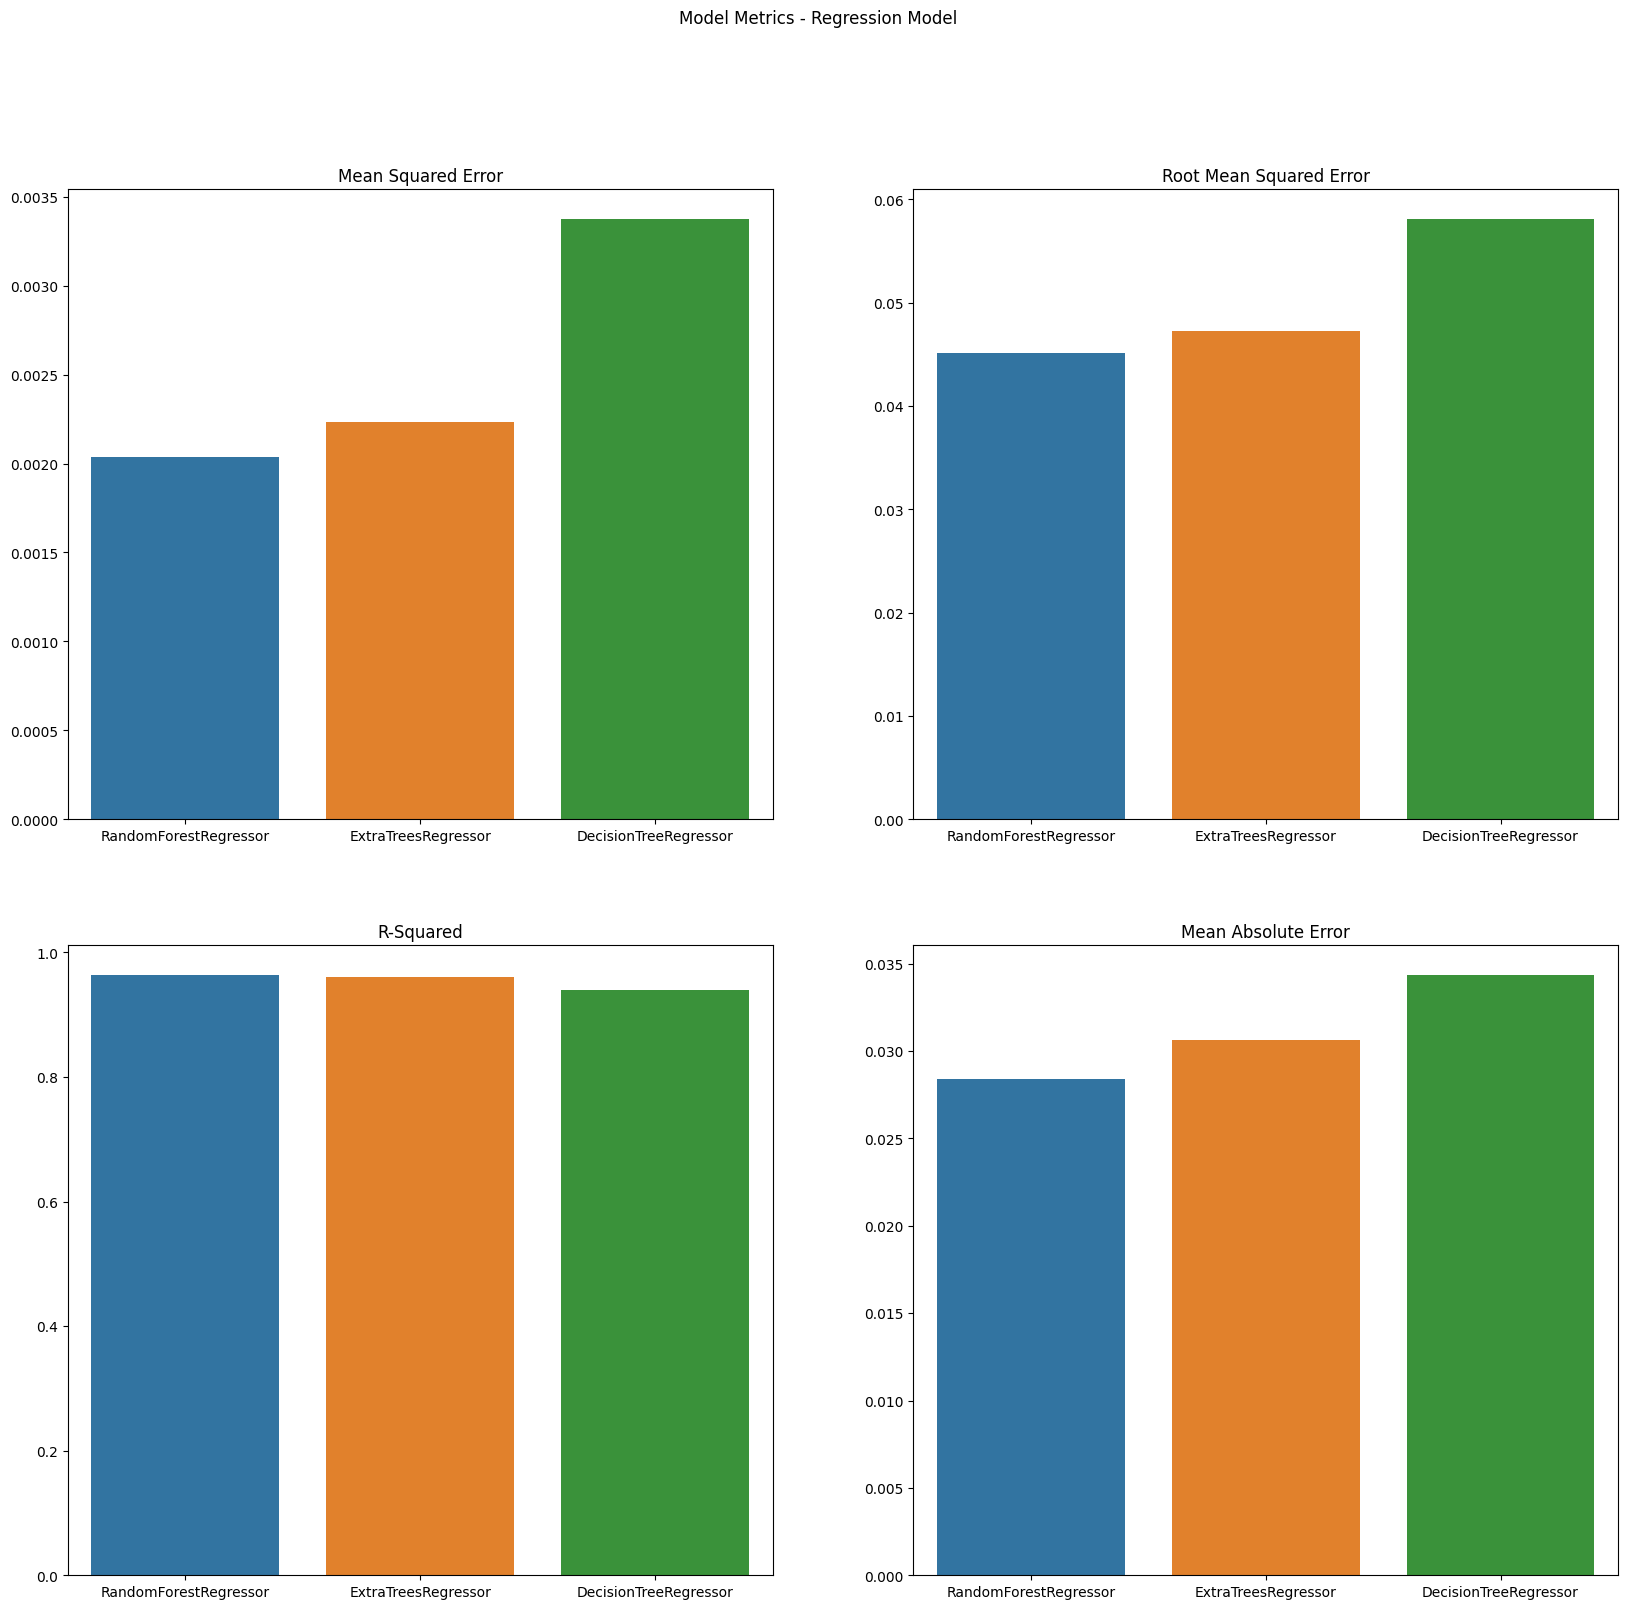

In [34]:
# Creating subplots for displaying various metrics of regression models

fig, axs = plt.subplots(2,2, figsize=(20,18))

# Adding a title to the overall figure
plt.suptitle('Model Metrics - Regression Model')

# Subplot 1: Mean Squared Error
sns.barplot(x=['RandomForestRegressor', 'ExtraTreesRegressor', 'DecisionTreeRegressor'],
            y=[mean_squared_error(y_test, rfr_predict_test),
               mean_squared_error(y_test, etr_predict_test),
               mean_squared_error(y_test, dtr_predict_test)], ax=axs[0,0])
axs[0,0].set_title("Mean Squared Error")

# Subplot 2: Root Mean Squared Error
sns.barplot(x=['RandomForestRegressor', 'ExtraTreesRegressor', 'DecisionTreeRegressor'],
            y=[np.sqrt(mean_squared_error(y_test, rfr_predict_test)),
               np.sqrt(mean_squared_error(y_test, etr_predict_test)),
               np.sqrt(mean_squared_error(y_test, dtr_predict_test))], ax=axs[0,1])
axs[0,1].set_title("Root Mean Squared Error")

# Subplot 3: R-Squared
sns.barplot(x=['RandomForestRegressor', 'ExtraTreesRegressor', 'DecisionTreeRegressor'],
            y=[r2_score(y_test, rfr_predict_test),
               r2_score(y_test, etr_predict_test),
               r2_score(y_test, dtr_predict_test)], ax=axs[1,0])
axs[1,0].set_title("R-Squared")

# Subplot 4: Mean Absolute Error
sns.barplot(x=['RandomForestRegressor', 'ExtraTreesRegressor', 'DecisionTreeRegressor'],
            y=[mean_absolute_error(y_test, rfr_predict_test),
               mean_absolute_error(y_test, etr_predict_test),
               mean_absolute_error(y_test, dtr_predict_test)], ax=axs[1,1])
axs[1,1].set_title("Mean Absolute Error")

# Displaying the subplots
plt.show()

# Model Validation

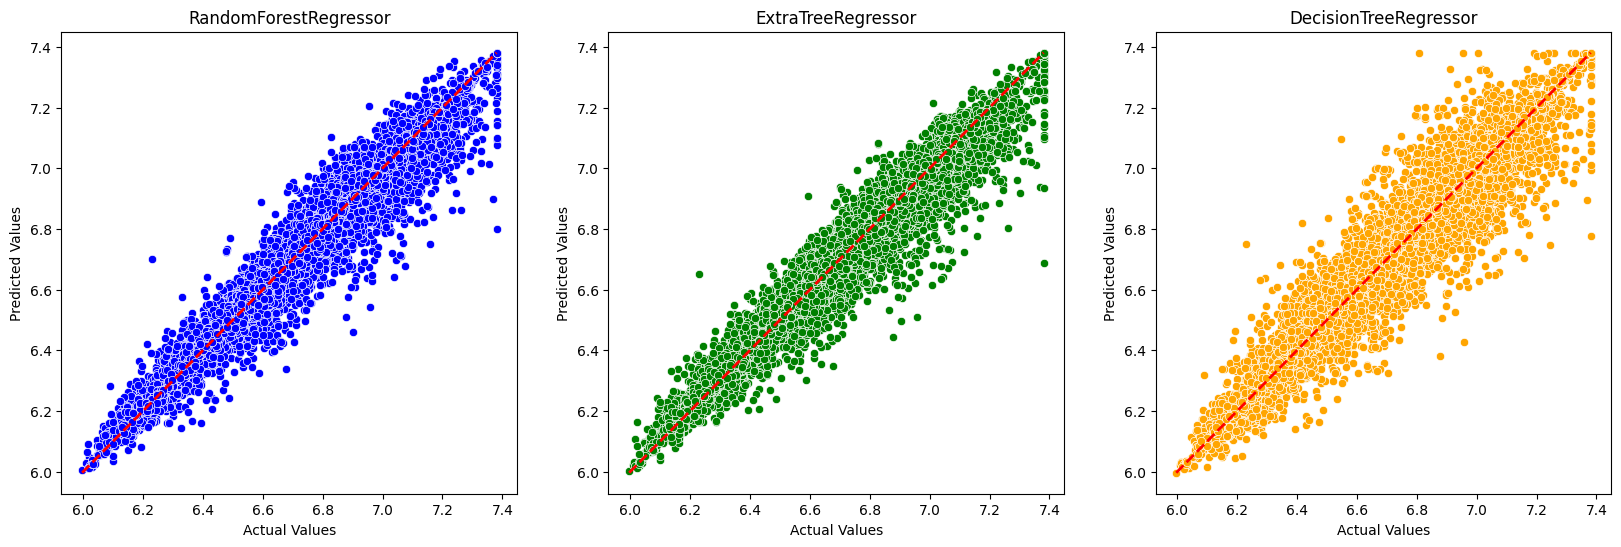

In [35]:
# Creating subplots for side-by-side comparison of regression model predictions

fig , ax = plt.subplots(1,3, figsize=(20,6))

# Subplot 1: RandomForestRegressor
sns.scatterplot(x=y_test, y=rfr_predict_test, color='blue', ax=ax[0])
ax[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
                          linestyle='--', color='r', linewidth=2)
ax[0].set_xlabel('Actual Values')
ax[0].set_ylabel('Predicted Values')
ax[0].set_title('RandomForestRegressor')

# Subplot 2: ExtraTreesRegressor
sns.scatterplot(x=y_test, y=etr_predict_test, color='green', ax=ax[1])
ax[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
                          linestyle='--', color='r', linewidth=2)
ax[1].set_xlabel('Actual Values')
ax[1].set_ylabel('Predicted Values')
ax[1].set_title('ExtraTreeRegressor')

# Subplot 3: DecisionTreeRegressor
sns.scatterplot(x=y_test, y=dtr_predict_test, color='orange', ax=ax[2])
ax[2].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
                          linestyle='--', color='r', linewidth=2)
ax[2].set_xlabel('Actual Values')
ax[2].set_ylabel('Predicted Values')
ax[2].set_title('DecisionTreeRegressor')

# Displaying the subplots
plt.show()

In [36]:
# Pickling 'model_rfr' - trained RandomForestRegressor model
with open('copper_reg.pkl', 'wb') as f:
  pickle.dump(rfr, f)

In [37]:
# Opening the file in binary read mode ('rb') and loading the model
with open('copper_reg.pkl', 'rb') as f:
  model_rfr = pickle.load(f)

In [38]:
y_pred = model_rfr.predict(x[:1].values)
price = np.round(np.exp(y_pred),2)
print(price[0])

1069.01
